In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Teams/Petabyte\ Transformers/Data

/content/drive/.shortcut-targets-by-id/1gMjREhmIs7NfuwoVW9P-PT6Lq3l-oczL/Teams/Petabyte Transformers/Data


In [3]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import logging 
import numpy as np
from sklearn import svm
from sklearn.svm import SVC, SVR
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.combine import SMOTEENN
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FactorAnalysis,  PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [8]:
df = pd.read_csv('amalgamated.csv')
del df[df.columns[0]]

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.loc[df['nameOrig'] == 'C1231006815']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOri
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C1231006815


In [ ]:
df.loc[df['nameDest'] == 'M1979787155']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOri
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C1231006815


In [9]:
# run
df_samp = df.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(frac=0.01))
df_samp.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2930214,229,CASH_IN,3655.570000,C356522519,4.679446e+06,4.683101e+06,C1733578715,1.306596e+04,9.410390e+03,0,0
10755562,8,CASH_OUT,15176.441366,160_19383_0,3.277746e-01,0.000000e+00,160_8372_0,1.119728e+06,7.629778e+05,0,0
8182797,36,PAYMENT,2179.135488,160_670083_0,9.203881e+04,8.985967e+04,160_289249_0,1.585756e+01,1.246871e+01,0,0
7604645,331,CASH_IN,294830.988424,160_4687686_0,3.688530e+04,0.000000e+00,160_759001_0,9.696098e+05,4.417468e+05,0,0
8532616,298,CASH_OUT,187924.534321,160_3974940_0,1.704852e+00,0.000000e+00,160_1505080_0,1.393422e+06,1.581340e+06,0,0


In [ ]:
n = len(pd.unique(df['nameOrig']))

In [ ]:
m = len(pd.unique(df['nameDest']))

In [ ]:
print(n)
print(m)

12706642
5450216


In [ ]:
df_isfraud = df[df.isFraud==1]

In [ ]:
df_isfraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOri
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,C1231006815
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,C1231006815
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0,C1231006815
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0,C1231006815
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0,C1231006815


In [ ]:
df.loc[df['nameDest'] == 'C553264065']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
6167,6,TRANSFER,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0
7903,7,CASH_IN,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0
16381,8,CASH_OUT,111622.39,C1457214570,2347.00,0.00,C553264065,99729.44,5254.44,0,0
20003,8,CASH_IN,206097.39,C161724858,1991.12,208088.52,C553264065,211351.84,5254.44,0,0
62736,9,TRANSFER,1447322.21,C1726358988,65634.00,0.00,C553264065,5254.44,1317666.01,0,0
91045,10,CASH_IN,134910.64,C1259498020,1103235.38,1238146.02,C553264065,1452576.65,1317666.01,0,0
113717,11,CASH_IN,13719.36,C22793463,21436698.29,21450417.65,C553264065,1317666.01,1303946.65,0,0
227904,14,CASH_OUT,340825.56,C2054307415,0.00,0.00,C553264065,1303946.65,1384840.44,0,0
242458,14,CASH_IN,354489.99,C47550004,5758825.08,6113315.08,C553264065,1644772.21,1384840.44,0,0


In [ ]:
df.groupby('step')['isFraud'].value_counts()

step  isFraud
1     0          5822
      1            40
2     0          2197
      1            16
3     0          1189
                 ... 
739   1            19
740   1            10
741   1            38
742   1            29
743   1            15
Name: isFraud, Length: 1164, dtype: int64

In [ ]:
df.groupby('step')['step'].value_counts()

step  step
1     1       5862
2     2       2213
3     3       1201
4     4       1223
5     5       1472
              ... 
739   739       19
740   740       10
741   741       38
742   742       29
743   743       15
Name: step, Length: 743, dtype: int64

In [10]:
# run
df_samp_reg =  pd.get_dummies(df_samp,columns=['type'],drop_first=True)
df_samp_reg.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2930214,229,3655.570000,C356522519,4.679446e+06,4.683101e+06,C1733578715,1.306596e+04,9.410390e+03,0,0,0,0,0,0
10755562,8,15176.441366,160_19383_0,3.277746e-01,0.000000e+00,160_8372_0,1.119728e+06,7.629778e+05,0,0,1,0,0,0
8182797,36,2179.135488,160_670083_0,9.203881e+04,8.985967e+04,160_289249_0,1.585756e+01,1.246871e+01,0,0,0,0,1,0
7604645,331,294830.988424,160_4687686_0,3.688530e+04,0.000000e+00,160_759001_0,9.696098e+05,4.417468e+05,0,0,0,0,0,0
8532616,298,187924.534321,160_3974940_0,1.704852e+00,0.000000e+00,160_1505080_0,1.393422e+06,1.581340e+06,0,0,1,0,0,0


In [11]:
# run
df_samp_features = df_samp_reg.drop(['nameOrig','nameDest','oldbalanceOrg','oldbalanceDest'],axis=1)

In [11]:
# df_smple = df.drop(['type','nameOrig','nameDest','oldbalanceOrg','oldbalanceDest','isFlaggedFraud'],axis=1)

In [ ]:
df_smple.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud
0,1,9839.64,160296.36,0.0,0
1,1,1864.28,19384.72,0.0,0
2,1,181.00,0.00,0.0,1
3,1,181.00,0.00,0.0,1
4,1,11668.14,29885.86,0.0,0


In [12]:
# run
df_samp_features.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2930214,229,3655.570000,4.683101e+06,9.410390e+03,0,0,0,0,0,0
10755562,8,15176.441366,0.000000e+00,7.629778e+05,0,0,1,0,0,0
8182797,36,2179.135488,8.985967e+04,1.246871e+01,0,0,0,0,1,0
7604645,331,294830.988424,0.000000e+00,4.417468e+05,0,0,0,0,0,0
8532616,298,187924.534321,0.000000e+00,1.581340e+06,0,0,1,0,0,0


<AxesSubplot:>

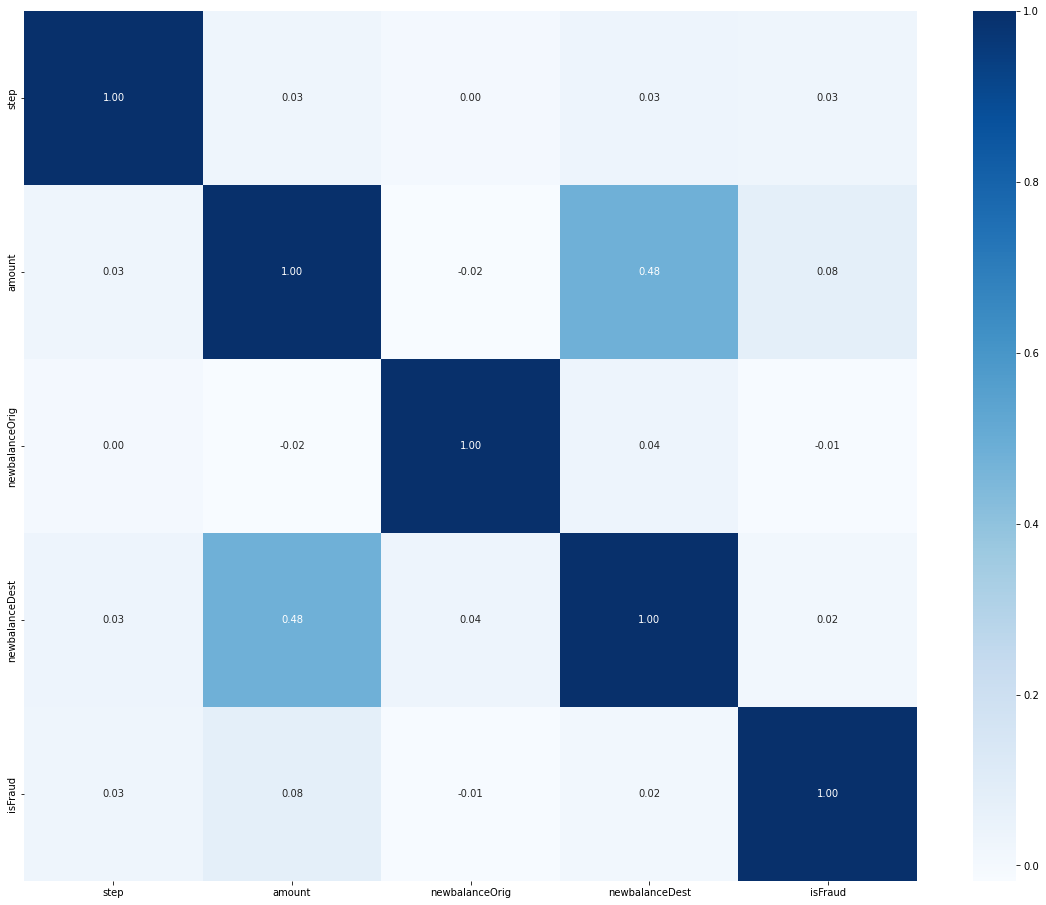

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(df_samp_features.corr(),cmap="Blues",annot=True,fmt='.2f')

In [ ]:
n_factors = 2 # set the number of factors
fa = FactorAnalysis(n_components=n_factors, random_state=0)
x_array = np.array(df_samp_features)
x_transform = fa.fit_transform(x_array)

In [ ]:
x_transform.shape

(12725, 2)

In [ ]:
# Extract the factor loadings
factor_loadings = fa.components_.T

print(factor_loadings)

[[ 3.12558208e-01  5.00429872e+00]
 [-1.24316266e+04  3.38739882e+05]
 [ 2.90160296e+06 -1.97074318e+03]
 [ 1.41233883e+05  3.92224106e+06]
 [-5.48590792e-04  6.80779574e-04]]


In [37]:
feature_names = df_samp_features.columns.values.tolist()

In [38]:
print(feature_names)

['step', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']




 PCA :

[[ 1.27723909e-06 -2.59112620e-08]
 [ 8.75465790e-02 -1.38187739e-02]
 [ 5.56614575e-02  9.98409504e-01]
 [ 9.94604142e-01 -5.46580690e-02]
 [ 1.73731398e-10 -2.10261509e-10]]


 Unrotated FA :

[[ 3.12558208e-01  5.00429872e+00]
 [-1.24316266e+04  3.38739882e+05]
 [ 2.90160296e+06 -1.97074318e+03]
 [ 1.41233883e+05  3.92224106e+06]
 [-5.48590792e-04  6.80779574e-04]]


 Varimax FA :

[[ 1.81181008e-01  5.01077557e+00]
 [-2.13129626e+04  3.38297222e+05]
 [ 2.90065621e+06  7.41429774e+04]
 [ 3.82994989e+04  3.92459617e+06]
 [-5.66259807e-04  6.66155025e-04]]


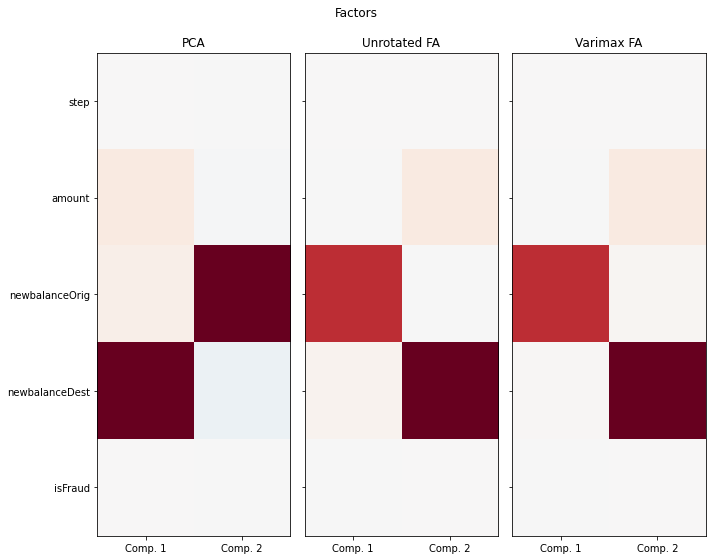

In [ ]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(df_samp_features)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [ ]:
scaler = RobustScaler()
df_samp_features_scaled = pd.DataFrame((scaler.fit_transform(df_samp_features)),columns=df_samp_features.columns)

In [10]:
df_samp_features.head()

,Unnamed: 0,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1377803,1377803,138,173559.590000,1.290144e+05,1.735596e+05,0,0,1,0,0,0
11486852,5124232,253,187753.896284,0.000000e+00,1.490890e+06,0,0,0,0,0,0
10616427,4253807,301,11882.682035,0.000000e+00,8.316275e+00,0,0,0,0,1,0
6106447,6106447,525,234228.080000,0.000000e+00,2.342281e+05,0,0,0,0,0,1
6580565,217945,228,48241.034680,1.035338e+07,6.995444e+05,0,0,0,0,0,0


In [ ]:
print(a)

[[-5.50561798e-01  3.21649452e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 1.60674157e+00  7.20886348e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.98876404e-01  1.12497047e+01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 ...
 [ 1.89325843e+00  4.28121729e-03  1.01279265e-05 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.26404494e+00  1.42424442e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.10112360e+00  3.88087538e+01 -1.82302678e-04 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [13]:
b = np.array(df_samp_features)
y_samp_fraud= b[:,4] # classes having 0 and 1
y_samp_fraud = y_samp_fraud.astype('int')
x_samp_fraud = df_samp_features.drop('isFraud',axis=1)
#x_array = np.array(x_samp_fraud)

In [ ]:
## nearmiss with regular df with isfraud column, nearmiss not that good

In [80]:
nm = NearMiss()
X_under,y_under=nm.fit_resample(x_samp_fraud,y_samp_fraud)

In [15]:
os =  RandomOverSampler()
X_over, y_over = os.fit_resample(x_samp_fraud, y_samp_fraud)

In [14]:
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(x_samp_fraud, y_samp_fraud)

In [90]:
print(X_under.shape)
print(y_under.shape)

(328, 9)
(328,)
(251394, 9)


In [16]:
print(X_over.shape)
print(y_over.shape)

(254176, 9)
(254176,)


In [17]:
print(X_smote.shape)
print(y_smote.shape)

(251450, 9)
(251450,)


In [72]:
X_under.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,399,20535.898460,0.0,8.008963,0,0,0,0,1,0
1,356,20511.805029,0.0,13.200774,0,0,0,0,1,0
2,397,20434.003560,0.0,4.358767,0,0,0,0,1,0
3,402,20483.120000,0.0,0.000000,0,0,0,0,1,0
4,403,20413.559860,0.0,3.327003,0,0,0,0,1,0


In [61]:
X_over.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,47,2461.613518,8669.121635,4.428945e+00,0,0,0,1,0
1,570,58644.452166,99121.658621,2.051101e+06,0,1,0,0,0
2,43,2239.414150,0.000000,1.559943e+01,0,0,0,1,0
3,234,146878.548561,0.000000,2.226432e+05,0,1,0,0,0
4,18,27550.930000,0.000000,2.755093e+04,0,1,0,0,0


In [87]:
X_smote.head()

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,47,2461.613518,8669.121635,4.428945e+00,0,0,0,1,0
1,570,58644.452166,99121.658621,2.051101e+06,0,1,0,0,0
2,43,2239.414150,0.000000,1.559943e+01,0,0,0,1,0
3,234,146878.548561,0.000000,2.226432e+05,0,1,0,0,0
4,18,27550.930000,0.000000,2.755093e+04,0,1,0,0,0


In [81]:
a = np.array(X_under)
y_under_amount= a[:,1]
y_under_amount = y_under_amount.astype('float')
x_under_amount = X_under.drop('amount',axis=1)
x_under_array = np.array(X_under)

In [18]:
c = np.array(X_over)
y_over_amount= c[:,1] # classes having 0 and 1
y_over_amount = y_over_amount.astype('float')
x_over_amount = X_over.drop('amount',axis=1)
x_over_array = np.array(x_over_amount)

In [19]:
d = np.array(X_smote)
y_smote_amount= d[:,1] # classes having 0 and 1
y_smote_amount = y_smote_amount.astype('float')
x_smote_amount = X_smote.drop('amount',axis=1)
x_smote_array = np.array(x_smote_amount)

In [20]:
print(len(x_smote_array))
print(len(y_smote_amount))

251450
251450


In [ ]:
for i in y_over_amount:
  if i == 0 :
    i == 0
  else : 
    i = np.log(i)

In [74]:
x_under_amount.head()

,step,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,399,0.0,8.008963,0,0,0,0,1,0
1,356,0.0,13.200774,0,0,0,0,1,0
2,397,0.0,4.358767,0,0,0,0,1,0
3,402,0.0,0.000000,0,0,0,0,1,0
4,403,0.0,3.327003,0,0,0,0,1,0


In [65]:
print(y_over_amount)

[2.46161352e+03 5.86444522e+04 2.23941415e+03 ... 5.01101410e+05
 9.32925600e+05 1.00000050e+07]


In [ ]:
y_log_df = pd.DataFrame(y_log, columns = ['amount'])
y_log_df.fillna(0.0)


,amount
0,9.194174
1,7.530630
2,5.198497
3,5.198497
4,9.364617
...,...
12725235,10.042498
12725236,14.129146
12725237,14.963053
12725238,11.233943


In [ ]:
y_log_df.isna().count

<bound method DataFrame.count of           amount
0          False
1          False
2          False
3          False
4          False
...          ...
12725235   False
12725236   False
12725237   False
12725238   False
12725239   False

[12725240 rows x 1 columns]>

In [ ]:
y_log_nonan = np.array(y_log_df['amount'])
print(y_log_nonan)

[ 9.1941744   7.5306302   5.19849703 ... 14.96305277 11.23394317
 15.4019707 ]


In [ ]:
print(y_log)

0       -1.134293
1       -0.327274
2        2.420342
3        0.000000
4       -2.398605
           ...   
12720   -1.528573
12721    0.366957
12722   -5.453518
12723    0.353641
12724    3.658646
Name: amount, Length: 12725, dtype: float64


In [ ]:
np.isnan(y_log_nonan).all()

False

In [ ]:
np.isfinite(y_log_nonan).all()

False

In [ ]:
np.nan_to_num(y_log_nonan) 

array([ 9.1941744 ,  7.5306302 ,  5.19849703, ..., 14.96305277,
       11.23394317, 15.4019707 ])

In [32]:
print(y_samp_features)

[140600.31 280841.15 338141.13 ... 306833.41 178616.12 212966.59]


In [38]:
print(x_array)

[[ 3.99000000e+02  2.05358985e+04  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 3.56000000e+02  2.05118050e+04  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 3.97000000e+02  2.04340036e+04  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 6.57000000e+02  4.96110221e+06  4.40000000e+01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.73000000e+02  4.75310610e+05 -4.70000000e+01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 2.87000000e+02  2.23730400e+05  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_over_array, y_over_amount, test_size=0.3,random_state=109) # 70% training and 30% test


In [82]:
X_train, X_test, y_train, y_test = train_test_split(x_under_array, y_under_amount, test_size=0.3,random_state=109) # 70% training and 30% test


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_smote_array, y_smote_amount, test_size=0.3,random_state=109) # 70% training and 30% test


In [68]:
print(X_train)
print(y_train)

[[ 3.75000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 5.94000000e+02 -5.00000000e+01  5.03722304e+03 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 4.51000000e+02  0.00000000e+00  5.68792530e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.48000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 3.78000000e+02  0.00000000e+00  6.69387355e+06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.00000000e+01  2.74053410e+05  6.84288090e+05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[ 38621.63       304075.48       141869.27       ... 291264.2
 111207.40019095 273856.41      ]


In [ ]:
## linear regression

In [ ]:
np.isnan(y_train).any()

True

In [ ]:
np.nan_to_num(y_train) 

array([10.86889944,  8.98895076,  9.34150381, ...,  9.99675577,
       11.70896636, 12.94226044])

In [83]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor", 
         "KNNRegressor", "DecisionTreeRegressor","GradientBoostingRegressor", 
         "XgBoost"]
regressions = [ MLPRegressor(random_state=1, max_iter=500),
LinearRegression(),
RandomForestRegressor(max_depth=5, random_state=0),
KNeighborsRegressor(n_neighbors=2),
DecisionTreeRegressor(random_state=0),
GradientBoostingRegressor(random_state=0),
XGBRegressor()]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

max_score = 0.0
max_class = ''
# iterate over regressions
for name, rg in zip(names, regressions):
  start_time = time.time()
  #score = cross_val_score(rg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
  #mean_score = -1 * score.mean()
  rg.fit(X_train, y_train)
  score = rg.score(X_test, y_test)
  print('Regression = %s, Score (test, accuracy) = %.2f' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
  if score > max_score:
    rg_best = rg
    max_score = score
    max_class = name
print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.2f', (max_class, max_score))

Regression = MLPRegressor, Score (test, accuracy) = 0.98 Training time = 0.81 seconds
Regression = LinearRegression, Score (test, accuracy) = 1.00 Training time = 0.00 seconds
Regression = RandomForestRegressor, Score (test, accuracy) = 1.00 Training time = 0.33 seconds
Regression = KNNRegressor, Score (test, accuracy) = 0.95 Training time = 0.00 seconds
Regression = DecisionTreeRegressor, Score (test, accuracy) = 1.00 Training time = 0.00 seconds
Regression = GradientBoostingRegressor, Score (test, accuracy) = 1.00 Training time = 0.20 seconds
Regression = XgBoost, Score (test, accuracy) = 1.00 Training time = 0.27 seconds
--------------------------------------------------------------------------------
Best --> Regression = %s, Score (test, accuracy) = %.2f ('LinearRegression', 1.0)


In [ ]:
## SMOTETomek tech

In [97]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor", 
         "KNNRegressor", "DecisionTreeRegressor","GradientBoostingRegressor", 
         "XgBoost"]
regressions = [ MLPRegressor(random_state=1, max_iter=500),
LinearRegression(),
RandomForestRegressor(max_depth=5, random_state=0),
KNeighborsRegressor(n_neighbors=2),
DecisionTreeRegressor(random_state=0),
GradientBoostingRegressor(random_state=0),
XGBRegressor()]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

max_score = 0.0
max_class = ''
# iterate over regressions
for name, rg in zip(names, regressions):
  start_time = time.time()
  #score = cross_val_score(rg, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
  #mean_score = -1 * score.mean()
  rg.fit(X_train, y_train)
  score = rg.score(X_test, y_test)
  print('Regression = %s, Score (test, accuracy) = %.2f' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
  if score > max_score:
    rg_best = rg
    max_score = score
    max_class = name
print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.2f', (max_class, max_score))

Regression = MLPRegressor, Score (test, accuracy) = 0.27 Training time = 56.32 seconds
Regression = LinearRegression, Score (test, accuracy) = 0.25 Training time = 0.07 seconds
Regression = RandomForestRegressor, Score (test, accuracy) = 0.77 Training time = 32.33 seconds
Regression = KNNRegressor, Score (test, accuracy) = 0.58 Training time = 2.01 seconds
Regression = DecisionTreeRegressor, Score (test, accuracy) = 0.91 Training time = 1.28 seconds
Regression = GradientBoostingRegressor, Score (test, accuracy) = 0.79 Training time = 29.47 seconds
Regression = XgBoost, Score (test, accuracy) = 0.89 Training time = 16.73 seconds
--------------------------------------------------------------------------------
Best --> Regression = %s, Score (test, accuracy) = %.2f ('DecisionTreeRegressor', 0.9134397598265195)


In [ ]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor", 
         "KNNRegressor", "DecisionTreeRegressor","GradientBoostingRegressor", 
         "XgBoost"]
regressions = [ MLPRegressor(solver = 'sgd', learning_rate = 'adaptive', max_iter=500, random_state=37),
LinearRegression(n_jobs = -1),
RandomForestRegressor(max_depth=50, random_state=37),
KNeighborsRegressor(n_neighbors=2, weights = 'distance',n_jobs = -1),
DecisionTreeRegressor(random_state=37),
GradientBoostingRegressor(random_state=37),
XGBRegressor()]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

max_score = 0.0
max_class = ''
# iterate over regressions
for name, rg in zip(names, regressions):
  start_time = time.time()
  ##score = cross_val_score(rg, X_train, y_train, cv=cv)
  ##mean_score = score.mean()
  rg.fit(X_train, y_train)
  score = rg.score(X_test, y_test)
  print('Regression = %s, Score (test, accuracy) = %.3f' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
  if score > max_score:
    rg_best = rg
    max_score = score
    max_class = name
print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.3f', (max_class, score))

In [ ]:
## adding cross-validation 

In [24]:
names = ["MLPRegressor", "LinearRegression", "RandomForestRegressor", 
         "KNNRegressor", "DecisionTreeRegressor","GradientBoostingRegressor", 
         "XgBoost"]
regressions = [ MLPRegressor(random_state=1, max_iter=500),
LinearRegression(),
RandomForestRegressor(max_depth=10, random_state=0),
KNeighborsRegressor(n_neighbors=2),
DecisionTreeRegressor(random_state=0),
GradientBoostingRegressor(random_state=0),
XGBRegressor()]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

max_score = 0.0
max_class = ''
# iterate over regressions
for name, rg in zip(names, regressions):
  start_time = time.time()
  score = cross_val_score(rg, X_train, y_train, cv=cv)
  mean_score = score.mean()
  ##rg.fit(X_train, y_train)
  ##score = rg.score(X_test, y_test)
  print('Regression = %s, Score (test, accuracy) = %.3f' %(name, mean_score), 'Training time = %.2f seconds' % (time.time() - start_time))
  if mean_score > max_score:
    rg_best = rg
    max_score = mean_score
    max_class = name
print(80*'-' )
print('Best --> Regression = %s, Score (test, accuracy) = %.3f', (max_class, max_score))

Regression = MLPRegressor, Score (test, accuracy) = 0.190 Training time = 330.32 seconds
Regression = LinearRegression, Score (test, accuracy) = 0.243 Training time = 0.80 seconds
Regression = RandomForestRegressor, Score (test, accuracy) = 0.851 Training time = 175.34 seconds
Regression = KNNRegressor, Score (test, accuracy) = 0.627 Training time = 3.37 seconds
Regression = DecisionTreeRegressor, Score (test, accuracy) = 0.919 Training time = 4.48 seconds
Regression = GradientBoostingRegressor, Score (test, accuracy) = 0.766 Training time = 98.56 seconds
Regression = XgBoost, Score (test, accuracy) = 0.892 Training time = 72.92 seconds
--------------------------------------------------------------------------------
Best --> Regression = %s, Score (test, accuracy) = %.3f ('DecisionTreeRegressor', 0.9192462611482094)
